In [1]:
# Import operating system interface for file path operations
import os
# Define data path - points to 'data' subdirectory for datasets
data_path = ['data']

## Question 1

* Import the data. 

* Also generate approximately 100 equally spaced x data points over the range of 0 to 1. Using these points, calculate the y-data which represents the "ground truth" (the real function) from the equation: $y = sin(2\pi x)$

* Plot the sparse data (`x` vs `y`) and the calculated ("real") data.


In [2]:
# Import essential libraries for data manipulation and numerical computations
import pandas as pd
import numpy as np

# Load the sinusoid dataset from CSV file (same directory as notebook)
filepath = 'X_Y_Sinusoid_Data.csv'
data = pd.read_csv(filepath)

# Generate "ground truth" data points for comparison
# Create 100 equally spaced points from 0 to 1
X_real = np.linspace(0, 1.0, 100)
# Calculate the true sinusoidal function: y = sin(2πx)
Y_real = np.sin(2 * np.pi * X_real)

In [3]:
# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Enable inline plotting in Jupyter notebook
%matplotlib inline

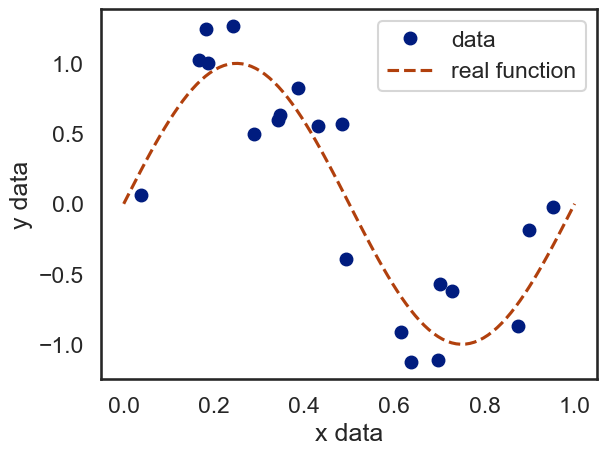

In [4]:
# Configure plotting style and aesthetics
sns.set_style('white')      # Clean white background
sns.set_context('talk')     # Larger fonts for presentations
sns.set_palette('dark')     # Dark color palette

# Create visualization comparing sparse data with true function
# Plot the noisy sparse data points as circles
ax = data.set_index('x')['y'].plot(ls='', marker='o', label='data')
# Plot the true sinusoidal function as a dashed line
ax.plot(X_real, Y_real, ls='--', marker='', label='real function')

# Add legend and axis labels
ax.legend()
ax.set(xlabel='x data', ylabel='y data');

## Question 2


* Using the `PolynomialFeatures` class from Scikit-learn's preprocessing library, create 20th order polynomial features.
* Fit this data using linear regression. 
* Plot the resulting predicted value compared to the calculated data.

Note that `PolynomialFeatures` requires either a dataframe (with one column, not a Series) or a 2D array of dimension (`X`, 1), where `X` is the length.

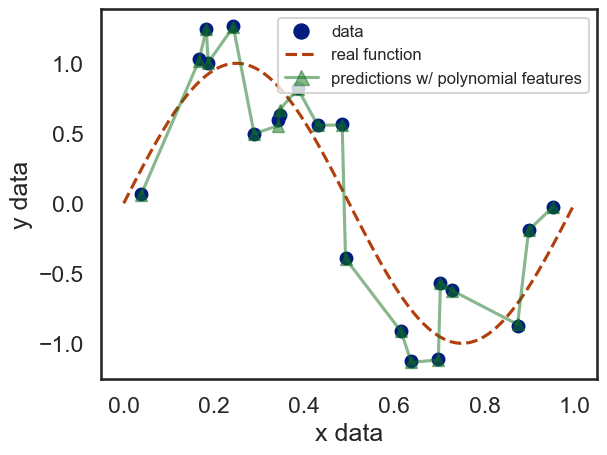

In [5]:
# Import machine learning tools for polynomial regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Setup polynomial features transformation
degree = 20  # Create polynomial features up to degree 20
pf = PolynomialFeatures(degree)
lr = LinearRegression()

# Extract features (X) and target (y) from the dataframe
# PolynomialFeatures requires 2D array, so use double brackets for X
X_data = data[['x']]  # 2D array format required
Y_data = data['y']    # 1D array is fine for target

# Transform original features into polynomial feature space
# This creates features: 1, x, x², x³, ..., x²⁰
X_poly = pf.fit_transform(X_data)

# Fit linear regression on polynomial features (polynomial regression)
lr = lr.fit(X_poly, Y_data)

# Generate predictions using the trained model
Y_pred = lr.predict(X_poly)

# Create comprehensive plot comparing all three datasets
plt.plot(X_data, Y_data, marker='o', ls='', label='data', alpha=1)
plt.plot(X_real, Y_real, ls='--', label='real function')
plt.plot(X_data, Y_pred, marker='^', alpha=.5, label='predictions w/ polynomial features')

# Customize legend size and positioning
plt.legend(fontsize=12, markerscale=1.2, loc='best')

# Set axis labels
ax = plt.gca()
ax.set(xlabel='x data', ylabel='y data')
plt.show()

## Question 3

* Perform the regression on using the data with polynomial features using ridge regression ($\alpha$=0.001) and lasso regression ($\alpha$=0.0001). 
* Plot the results, as was done in Question 1. 
* Also plot the magnitude of the coefficients obtained from these regressions, and compare them to those obtained from linear regression in the previous question. The linear regression coefficients will likely need a separate plot (or their own y-axis) due to their large magnitude. 

What does the comparatively large magnitude of the data tell you about the role of regularization?

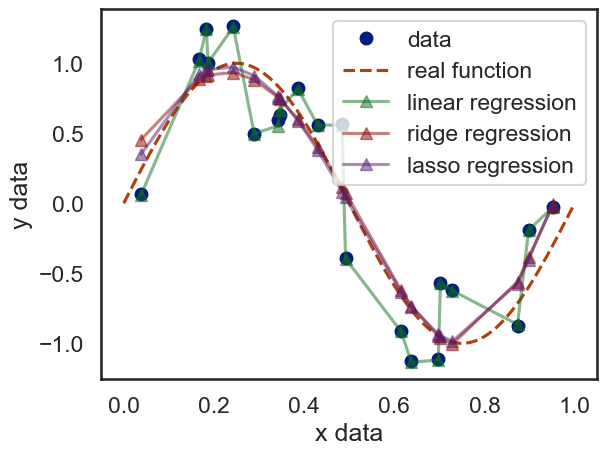

In [6]:
# Suppress sklearn warnings about regularization convergence
import warnings
warnings.filterwarnings('ignore', module='sklearn')

# Import regularized regression models
from sklearn.linear_model import Ridge, Lasso

# Ridge Regression (L2 regularization)
# Alpha = 0.001: Small regularization penalty
rr = Ridge(alpha=0.001)
rr = rr.fit(X_poly, Y_data)
Y_pred_rr = rr.predict(X_poly)

# Lasso Regression (L1 regularization) 
# Alpha = 0.0001: Very small regularization penalty
lassor = Lasso(alpha=0.0001)
lassor = lassor.fit(X_poly, Y_data)
Y_pred_lr = lassor.predict(X_poly)

# Compare all regression approaches in one plot
plt.plot(X_data, Y_data, marker='o', ls='', label='data')
plt.plot(X_real, Y_real, ls='--', label='real function')
plt.plot(X_data, Y_pred, label='linear regression', marker='^', alpha=.5)
plt.plot(X_data, Y_pred_rr, label='ridge regression', marker='^', alpha=.5)
plt.plot(X_data, Y_pred_lr, label='lasso regression', marker='^', alpha=.5)

plt.legend()

ax = plt.gca()
ax.set(xlabel='x data', ylabel='y data');

In [7]:
# Compare coefficient magnitudes across different regression methods
# This shows the effect of regularization on coefficient values

# Create DataFrame to store coefficients from each model
coefficients = pd.DataFrame()
coefficients['linear regression'] = lr.coef_.ravel()      # Unregularized
coefficients['ridge regression'] = rr.coef_.ravel()       # L2 regularized  
coefficients['lasso regression'] = lassor.coef_.ravel()   # L1 regularized

# Take absolute values to compare magnitudes
coefficients = coefficients.applymap(abs)

# Display summary statistics - notice the huge scale differences
coefficients.describe()  # Huge difference in scale between non-regularized vs regularized regression

C:\Users\Acer\AppData\Local\Temp\ipykernel_25460\3656370286.py:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  coefficients = coefficients.applymap(abs)


,linear regression,ridge regression,lasso regression
count,2.100000e+01,21.000000,21.000000
mean,5.754304e+13,2.169397,2.167284
std,5.999233e+13,2.900278,4.706731
min,1.611590e+07,0.000000,0.000000
25%,3.403676e+12,0.467578,0.000000
50%,3.649017e+13,1.017272,0.252181
75%,1.061917e+14,2.883507,1.641353
max,1.639660e+14,12.429635,20.176708


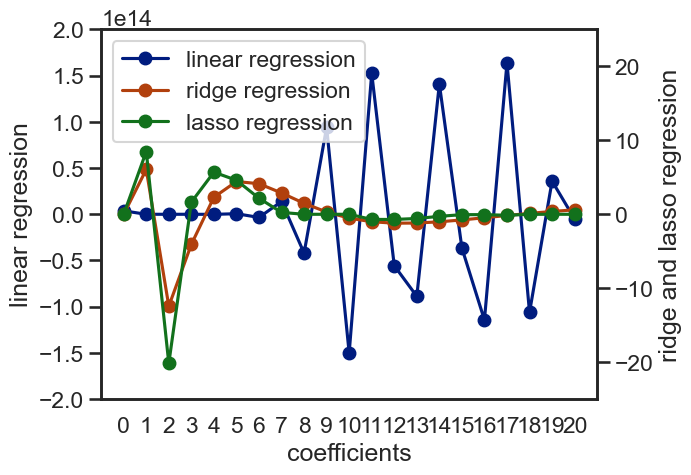

In [8]:
# Visualize coefficient magnitudes using dual y-axes
# Linear regression coefficients are so large they need their own scale
colors = sns.color_palette()

# Setup dual y-axes for different scales
ax1 = plt.axes()      # Left y-axis for linear regression
ax2 = ax1.twinx()     # Right y-axis for regularized regression

# Plot linear regression coefficients (very large scale)
ax1.plot(lr.coef_.ravel(), 
         color=colors[0], marker='o', label='linear regression')

# Plot regularized regression coefficients (much smaller scale)
ax2.plot(rr.coef_.ravel(), 
         color=colors[1], marker='o', label='ridge regression')

ax2.plot(lassor.coef_.ravel(), 
         color=colors[2], marker='o', label='lasso regression')

# Set appropriate y-axis limits for each scale
ax1.set_ylim(-2e14, 2e14)  # Huge range for linear regression
ax2.set_ylim(-25, 25)      # Reasonable range for regularized models

# Combine legends from both axes
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2)

# Label axes appropriately
ax1.set(xlabel='coefficients', ylabel='linear regression')
ax2.set(ylabel='ridge and lasso regression')

# Set x-axis ticks to show coefficient indices
ax1.set_xticks(range(len(lr.coef_)));

## Question 4

For the remaining questions, we will be working with the [data set](https://www.kaggle.com/c/house-prices-advanced-regression-techniques) from last lesson, which is based on housing prices in Ames, Iowa. There are an extensive number of features--see the exercises from week three for a discussion of these features.

To begin:

* Import the data with Pandas, remove any null values, and one hot encode categoricals. Either Scikit-learn's feature encoders or Pandas `get_dummies` method can be used.
* Split the data into train and test sets. 
* Log transform skewed features. 
* Scaling can be attempted, although it can be interesting to see how well regularization works without scaling features.

In [9]:
# Load the Ames Housing dataset for advanced regression analysis
filepath = 'Ames_Housing_Sales.csv'
data = pd.read_csv(filepath, sep=',')

Create a list of categorial data and one-hot encode. Pandas one-hot encoder (`get_dummies`) works well with data that is defined as a categorical.

In [10]:
# One-hot encode categorical variables for machine learning
# Get list of columns with string/categorical data types
one_hot_encode_cols = data.select_dtypes(include=['object', 'category']).columns.tolist()

# Convert string columns to pandas categorical type (if needed)
for col in one_hot_encode_cols:
    data[col] = pd.Categorical(data[col])

# Perform one-hot encoding: convert categories to binary columns
# This transforms categorical variables into numerical format for ML models
data = pd.get_dummies(data, columns=one_hot_encode_cols)

Next, split the data in train and test data sets.

In [11]:
# Split data into training and testing sets for model evaluation
from sklearn.model_selection import train_test_split

# 70% for training, 30% for testing, with fixed random state for reproducibility
train, test = train_test_split(data, test_size=0.3, random_state=42)

There are a number of columns that have skewed features--a log transformation can be applied to them. Note that this includes the `SalePrice`, our predictor. However, let's keep that one as is.

In [12]:
# Identify numerical columns that might need log transformation
# Create boolean mask to select float/continuous columns
mask = (data.dtypes == float) | (data.dtypes == np.float64)

# Get list of column names that are float type
float_cols = data.columns[mask]

In [13]:
# Identify highly skewed features that need log transformation
skew_limit = 0.75  # Threshold for considering a distribution as skewed

# Calculate skewness for all float columns in training data
skew_vals = train[float_cols].skew()

# Filter columns with absolute skewness > threshold
skew_cols = (skew_vals
             .sort_values(ascending=False)  # Sort by skewness magnitude
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {0}'.format(skew_limit)))

# Display highly skewed columns
skew_cols

,Skew
MiscVal,26.915364
PoolArea,15.777668
LotArea,11.501694
LowQualFinSF,11.210638
3SsnPorch,10.150612
ScreenPorch,4.599803
BsmtFinSF2,4.466378
EnclosedPorch,3.218303
LotFrontage,3.138032
MasVnrArea,2.492814


Transform all the columns where the skew is greater than 0.75, excluding "SalePrice".

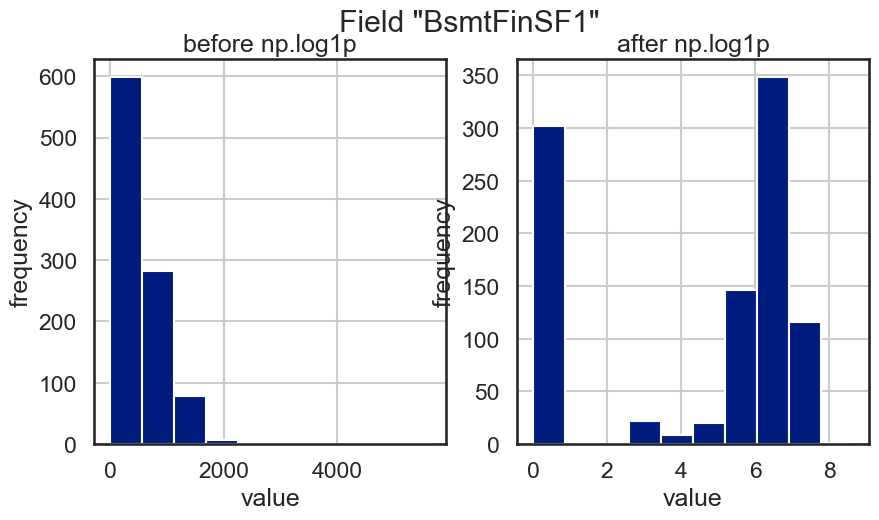

In [14]:
# OPTIONAL: Visualize the effect of log transformation on a skewed feature
# This demonstrates how log transformation can normalize skewed distributions

field = "BsmtFinSF1"  # Example of a skewed feature
fig, (ax_before, ax_after) = plt.subplots(1, 2, figsize=(10, 5))

# Plot original distribution (before transformation)
train[field].hist(ax=ax_before)
# Plot log-transformed distribution (after transformation)  
train[field].apply(np.log1p).hist(ax=ax_after)

# Add titles and labels
ax_before.set(title='before np.log1p', ylabel='frequency', xlabel='value')
ax_after.set(title='after np.log1p', ylabel='frequency', xlabel='value')
fig.suptitle('Field "{}"'.format(field));
# Distribution becomes more normal after log transformation

In [15]:
# Apply log transformation to skewed features (except SalePrice)
# Suppress pandas warnings about chained assignment
pd.options.mode.chained_assignment = None

# Transform each highly skewed column using log1p (log(1+x))
# log1p handles zero values better than regular log
for col in skew_cols.index.tolist():
    if col == "SalePrice":
        continue  # Keep SalePrice in original scale as our target variable
    # Transform training data
    train[col] = np.log1p(train[col])
    # Transform test data using the same transformation
    test[col]  = test[col].apply(np.log1p)  # same thing

Separate features from predictor.

In [16]:
# Separate features from target variable for supervised learning
# Create list of feature columns (all except SalePrice)
feature_cols = [x for x in train.columns if x != 'SalePrice']

# Split training data into features (X) and target (y)
X_train = train[feature_cols]
y_train = train['SalePrice']

# Split test data into features (X) and target (y)  
X_test  = test[feature_cols]
y_test  = test['SalePrice']

## Question 5

* Write a function **`rmse`** that takes in truth and prediction values and returns the root-mean-squared error. Use sklearn's `mean_squared_error`.  


In [17]:
# Import mean squared error metric for RMSE calculation
from sklearn.metrics import mean_squared_error

# Define custom RMSE function
# RMSE is more interpretable than MSE as it's in same units as target variable
def rmse(ytrue, ypredicted):
    """Calculate Root Mean Squared Error between true and predicted values"""
    return np.sqrt(mean_squared_error(ytrue, ypredicted))

* Fit a basic linear regression model
* print the root-mean-squared error for this model
* plot the predicted vs actual sale price based on the model.  

In [18]:
# Baseline Linear Regression Model
from sklearn.linear_model import LinearRegression

# Fit basic linear regression without regularization
linearRegression = LinearRegression().fit(X_train, y_train)

# Calculate RMSE on test set to evaluate baseline performance
linearRegression_rmse = rmse(y_test, linearRegression.predict(X_test))

# Display baseline RMSE for comparison with regularized models
print(linearRegression_rmse)

947309.704420197


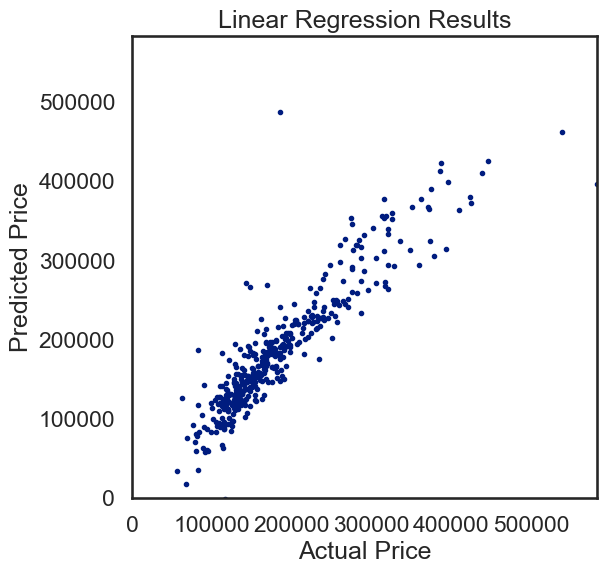

In [19]:
# Visualize Linear Regression results: Predicted vs Actual prices
f = plt.figure(figsize=(6,6))
ax = plt.axes()

# Scatter plot: actual prices (x-axis) vs predicted prices (y-axis)
# Points close to diagonal line indicate good predictions
ax.plot(y_test, linearRegression.predict(X_test), 
         marker='o', ls='', ms=3.0)

# Set axis limits to equal range for fair comparison
lim = (0, y_test.max())

ax.set(xlabel='Actual Price', 
       ylabel='Predicted Price', 
       xlim=lim,
       ylim=lim,  # Equal scales for x and y axes
       title='Linear Regression Results');

## Question 6

Ridge regression uses L2 normalization to reduce the magnitude of the coefficients. This can be helpful in situations where there is high variance. The regularization functions in Scikit-learn each contain versions that have cross-validation built in.

* Fit a regular (non-cross validated) Ridge model to a range of $\alpha$ values and plot the RMSE using the cross validated error function you created above.
* Use $$[0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 80]$$ as the range of alphas.
* Then repeat the fitting of the Ridge models using the range of $\alpha$ values from the prior section. Compare the results.

Now for the `RidgeCV` method. It's not possible to get the alpha values for the models that weren't selected, unfortunately. The resulting error values and $\alpha$ values are very similar to those obtained above.

In [20]:
# Ridge Regression with Cross-Validation for hyperparameter tuning
from sklearn.linear_model import RidgeCV

# Define range of alpha values to test (regularization strength)
alphas = [0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 80]

# RidgeCV automatically selects best alpha using cross-validation
ridgeCV = RidgeCV(alphas=alphas,    # Range of alpha values to test
                  cv=4).fit(X_train, y_train)  # 4-fold cross-validation

# Calculate RMSE with the best alpha found by cross-validation
ridgeCV_rmse = rmse(y_test, ridgeCV.predict(X_test))

# Display optimal alpha and corresponding RMSE
print(ridgeCV.alpha_, ridgeCV_rmse)

15.0 32195.77826017299


## Question 7


Much like the `RidgeCV` function, there is also a `LassoCV` function that uses an L1 regularization function and cross-validation. L1 regularization will selectively shrink some coefficients, effectively performing feature elimination.

The `LassoCV` function does not allow the scoring function to be set. However, the custom error function (`rmse`) created above can be used to evaluate the error on the final model.

Similarly, there is also an elastic net function with cross validation, `ElasticNetCV`, which is a combination of L2 and L1 regularization.

* Fit a Lasso model using cross validation and determine the optimum value for $\alpha$ and the RMSE using the function created above. Note that the magnitude of $\alpha$ may be different from the Ridge model.
* Repeat this with the Elastic net model.
* Compare the results via table and/or plot.

Use the following alphas:  
`[1e-5, 5e-5, 0.0001, 0.0005]`

In [21]:
# Lasso Regression with Cross-Validation
from sklearn.linear_model import LassoCV
import numpy as np

# Define smaller alpha range for Lasso (typically needs smaller values)
alphas2 = np.array([1e-5, 5e-5, 0.0001, 0.0005])

# LassoCV with cross-validation for optimal alpha selection
lassoCV = LassoCV(
    alphas=alphas2,      # Range of alpha values to test
    max_iter=50000,      # Maximum iterations for convergence
    cv=3                 # 3-fold cross-validation
).fit(X_train, y_train)

# Calculate RMSE with optimal alpha
lassoCV_rmse = rmse(y_test, lassoCV.predict(X_test))

# Display optimal alpha and RMSE (Lasso converges slower than Ridge)
print(lassoCV.alpha_, lassoCV_rmse)

0.0005 37753.025305155075


We can determine how many of these features remain non-zero.

In [22]:
# Analyze feature selection effect of Lasso regression
# Lasso's L1 penalty drives some coefficients to exactly zero (feature selection)
print('Of {} coefficients, {} are non-zero with Lasso.'.format(len(lassoCV.coef_), 
                                                               len(lassoCV.coef_.nonzero()[0])))

Of 283 coefficients, 264 are non-zero with Lasso.


Now try the elastic net, with the same alphas as in Lasso, and l1_ratios between 0.1 and 0.9

In [23]:
from sklearn.linear_model import ElasticNetCV
import numpy as np

l1_ratios = np.linspace(0.1, 0.9, 9)

elasticNetCV = ElasticNetCV(
    alphas=alphas2,
    l1_ratio=l1_ratios,
    max_iter=10000   # <-- int thay vì 1e4
).fit(X_train, y_train)

elasticNetCV_rmse = rmse(y_test, elasticNetCV.predict(X_test))

print(elasticNetCV.alpha_, elasticNetCV.l1_ratio_, elasticNetCV_rmse)


0.0005 0.1 35009.07612625832


Comparing the RMSE calculation from all models is easiest in a table.

In [24]:
rmse_vals = [linearRegression_rmse, ridgeCV_rmse, lassoCV_rmse, elasticNetCV_rmse]

labels = ['Linear', 'Ridge', 'Lasso', 'ElasticNet']

rmse_df = pd.Series(rmse_vals, index=labels).to_frame()
rmse_df.rename(columns={0: 'RMSE'}, inplace=1)
rmse_df

,RMSE
Linear,947309.704420
Ridge,32195.778260
Lasso,37753.025305
ElasticNet,35009.076126


We can also make a plot of actual vs predicted housing prices as before.

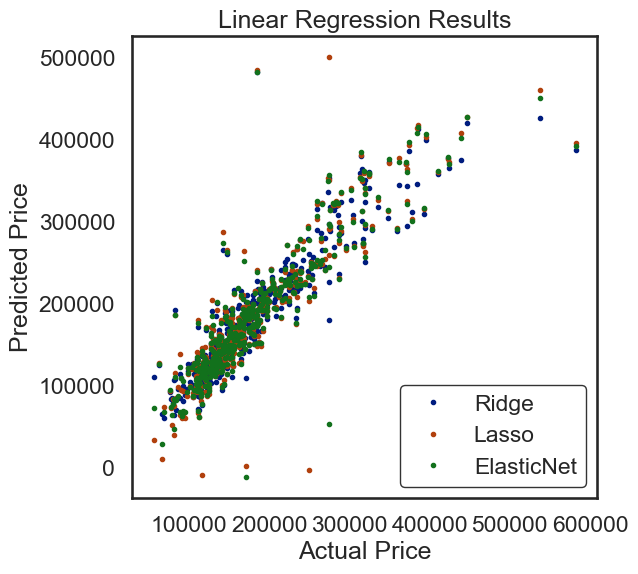

In [25]:
f = plt.figure(figsize=(6,6))
ax = plt.axes()

labels = ['Ridge', 'Lasso', 'ElasticNet']

models = [ridgeCV, lassoCV, elasticNetCV]

for mod, lab in zip(models, labels):
    ax.plot(y_test, mod.predict(X_test), 
             marker='o', ls='', ms=3.0, label=lab)


leg = plt.legend(frameon=True)
leg.get_frame().set_edgecolor('black')
leg.get_frame().set_linewidth(1.0)

ax.set(xlabel='Actual Price', 
       ylabel='Predicted Price', 
       title='Linear Regression Results');

## Question 8

Let's explore Stochastic gradient descent in this exercise.  
Recall that Linear models in general are sensitive to scaling.
However, SGD is *very* sensitive to scaling.  
Moreover, a high value of learning rate can cause the algorithm to diverge, whereas a too low value may take too long to converge.

* Fit a stochastic gradient descent model without a regularization penalty (the relevant parameter is `penalty`).
* Now fit stochastic gradient descent models with each of the three penalties (L2, L1, Elastic Net) using the parameter values determined by cross validation above. 
* Do not scale the data before fitting the model.  
* Compare the results to those obtained without using stochastic gradient descent.

In [26]:
from sklearn.linear_model import SGDRegressor

model_parameters_dict = {
    'Linear': {
        'penalty': None,       # không regularization
        'alpha': 0.0
    },
    'Lasso': {
        'penalty': 'l1',
        'alpha': lassoCV.alpha_
    },
    'Ridge': {
        'penalty': 'l2',
        'alpha': ridgeCV.alpha_
    },
    'ElasticNet': {
        'penalty': 'elasticnet',
        'alpha': elasticNetCV.alpha_,
        'l1_ratio': elasticNetCV.l1_ratio_
    }
}

new_rmses = {}
for modellabel, parameters in model_parameters_dict.items():
    SGD = SGDRegressor(
        max_iter=10000,
        random_state=42,
        **parameters
    )
    SGD.fit(X_train, y_train)
    new_rmses[modellabel] = rmse(y_test, SGD.predict(X_test))

rmse_df['RMSE-SGD'] = pd.Series(new_rmses)
rmse_df


,RMSE,RMSE-SGD
Linear,947309.704420,5.045388e+15
Ridge,32195.778260,2.845397e+15
Lasso,37753.025305,5.046198e+15
ElasticNet,35009.076126,6.377489e+14


Notice how high the error values are! The algorithm is diverging. This can be due to scaling and/or learning rate being too high. Let's adjust the learning rate and see what happens.

* Pass in `eta0=1e-7` when creating the instance of `SGDClassifier`.
* Re-compute the errors for all the penalties and compare.

In [27]:
from sklearn.linear_model import SGDRegressor

model_parameters_dict = {
    'Linear': {
        'penalty': None,    # <-- dùng None, không phải 'none'
        'alpha': 0.0
    },
    'Lasso': {
        'penalty': 'l1',
        'alpha': lassoCV.alpha_
    },
    'Ridge': {
        'penalty': 'l2',
        'alpha': ridgeCV.alpha_
    },
    'ElasticNet': {
        'penalty': 'elasticnet',
        'alpha': elasticNetCV.alpha_,
        'l1_ratio': elasticNetCV.l1_ratio_
    }
}

new_rmses = {}
for modellabel, parameters in model_parameters_dict.items():
    SGD = SGDRegressor(
        max_iter=10000,
        random_state=42,
        eta0=1e-7,
        learning_rate='constant',   # để eta0 có hiệu lực
        **parameters
    )
    SGD.fit(X_train, y_train)
    new_rmses[modellabel] = rmse(y_test, SGD.predict(X_test))

rmse_df['RMSE-SGD-learningrate'] = pd.Series(new_rmses)
rmse_df


,RMSE,RMSE-SGD,RMSE-SGD-learningrate
Linear,947309.704420,5.045388e+15,96461.982574
Ridge,32195.778260,2.845397e+15,96663.817305
Lasso,37753.025305,5.046198e+15,96461.982605
ElasticNet,35009.076126,6.377489e+14,96461.988680


Now let's scale our training data and try again.

* Fit a `MinMaxScaler` to `X_train` create a variable `X_train_scaled`.
* Using the scaler, transform `X_test` and create a variable `X_test_scaled`. 
* Apply the same versions of SGD to them and compare the results. Don't pass in a eta0 this time.

In [28]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

new_rmses = {}
for modellabel, parameters in model_parameters_dict.items():
    # following notation passes the dict items as arguments
    SGD = SGDRegressor(**parameters)
    SGD.fit(X_train_scaled, y_train)
    new_rmses[modellabel] = rmse(y_test, SGD.predict(X_test_scaled))

rmse_df['RMSE-SGD-scaled'] = pd.Series(new_rmses)
rmse_df

,RMSE,RMSE-SGD,RMSE-SGD-learningrate,RMSE-SGD-scaled
Linear,947309.704420,5.045388e+15,96461.982574,33052.853130
Ridge,32195.778260,2.845397e+15,96663.817305,72252.589400
Lasso,37753.025305,5.046198e+15,96461.982605,32813.045385
ElasticNet,35009.076126,6.377489e+14,96461.988680,33051.483184


In [29]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

new_rmses = {}
for modellabel, parameters in model_parameters_dict.items():
    # following notation passes the dict items as arguments
    SGD = SGDRegressor(**parameters)
    SGD.fit(X_train_scaled, y_train)
    new_rmses[modellabel] = rmse(y_test, SGD.predict(X_test_scaled))

rmse_df['RMSE-SGD-scaled'] = pd.Series(new_rmses)
rmse_df

,RMSE,RMSE-SGD,RMSE-SGD-learningrate,RMSE-SGD-scaled
Linear,947309.704420,5.045388e+15,96461.982574,32759.760762
Ridge,32195.778260,2.845397e+15,96663.817305,72465.416001
Lasso,37753.025305,5.046198e+15,96461.982605,32835.566022
ElasticNet,35009.076126,6.377489e+14,96461.988680,32861.631048
